### Importing Necessary Libraris

In [ ]:
import os
import pandas as pds
import matplotlib.pyplot as plt
import skimage
import cv2
from skimage.feature import hog
from skimage.feature import local_binary_pattern


### Loading Images `Normal` and `Pnumonia`

In [ ]:
data = 'chest_xray/chest_xray/train'

### Image Preprocessing

In [ ]:
## Image preprocessing------------------
data_dir = 'chest_xray/chest_xray/train'

img_size = (128, 128)

preprocessed_folder_path = 'preprocessed_images'

if not os.path.exists(preprocessed_folder_path):
    os.mkdir(preprocessed_folder_path)

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    category_folder_path = os.path.join(preprocessed_folder_path, folder)
    
    if not os.path.exists(category_folder_path):
        os.mkdir(category_folder_path)
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        
        if image is not None:
            resized_image = cv2.resize(image, img_size)
            gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
            normalized_image = cv2.equalizeHist(gray_image)
            preprocessed_image_path = os.path.join(category_folder_path, filename)
            cv2.imwrite(preprocessed_image_path, normalized_image)


### Images before preprocessing

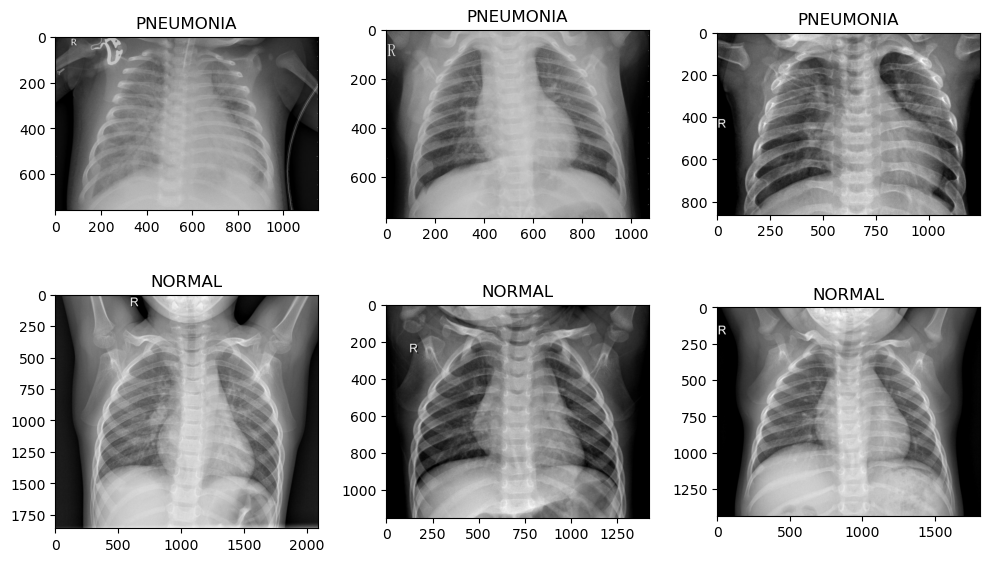

In [ ]:
## printing original images
categories = ['PNEUMONIA', 'NORMAL']  

fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs = axs.ravel()

for i, category in enumerate(categories):
    folder_path = os.path.join(data, category)
    
    for j, filename in enumerate(os.listdir(folder_path)):
        if j == 3:  
            break
            
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        
        axs[i*3+j].imshow(image)
        axs[i*3+j].set_title(category)
        
plt.tight_layout()
plt.show()


### Images after preprocessing

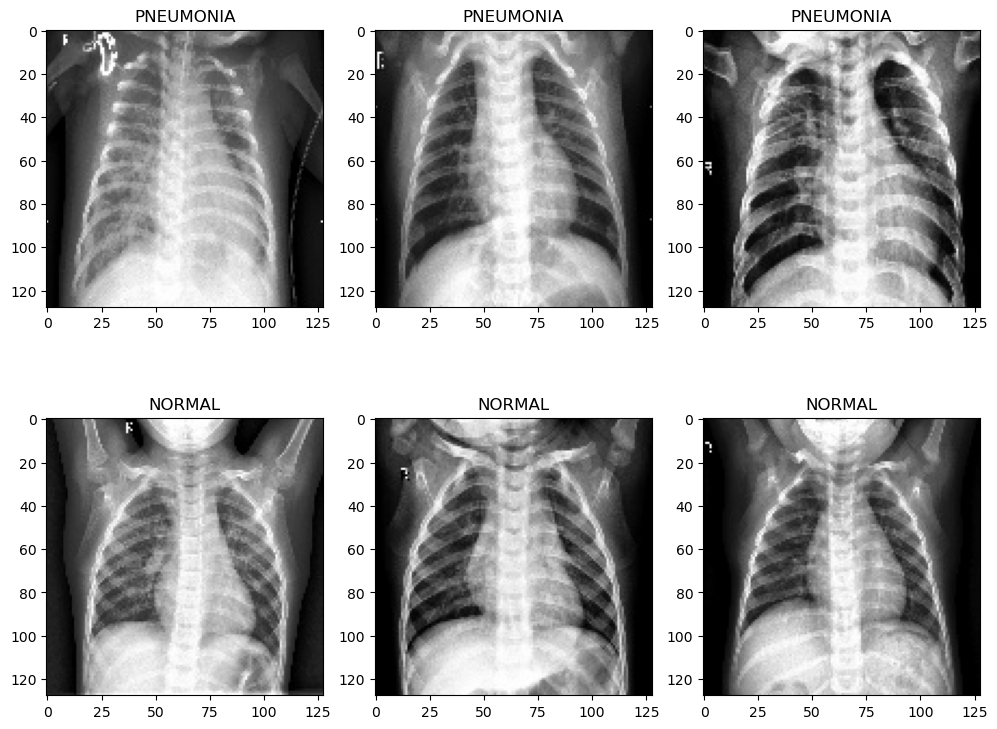

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

pre_img = 'preprocessed_images' 
categories = ['PNEUMONIA', 'NORMAL']  

fig, axs = plt.subplots(2, 3, figsize=(10, 8))
axs = axs.ravel()

# Loop through each category and display a sample of images
for i, category in enumerate(categories):
    folder_path = os.path.join(pre_img, category)
    
    # Loop through each image in the folder
    for j, filename in enumerate(os.listdir(folder_path)):
        if j == 3:  # Display only the first 3 images in each folder
            break
            
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path) #, cv2.IMREAD_GRAYSCALE  # Load image in grayscale
        
        axs[i*3+j].imshow(image, cmap='gray')
        axs[i*3+j].set_title(category)
        
plt.tight_layout()
plt.show()


In [ ]:
# import cv2
# import os

# # set threshold value
# threshold_value = 150

# # loop through preprocessed images directory
# for filename in os.listdir(pre_img):
#     if filename.endswith('.jpeg'):
#         # read image
#         img = cv2.imread(os.path.join(pre_img, filename), cv2.IMREAD_GRAYSCALE)
        
#         # apply thresholding
#         _, thresholded_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
        
#         # save thresholded image
#         cv2.imwrite(os.path.join(pre_img, f'thresholded_{filename}'), thresholded_img)


Feature Extraction Method-1 <br>
HOG-`Histogram Oriented Gradient`

In [ ]:
from skimage.feature import _hog
preprocessed_folder_path = 'preprocessed_images'

# Parameters of HOG
orientation = 9
pixels_per_cell = (8,8)
cells_per_block = (3,3)
transform_sqrt = True,
normalize = 'L2'

features1 = []
levels = []

label_dict = {'NORMAL': 0, 'PNEUMONIA':1}

for folder in os.listdir(preprocessed_folder_path):
    folder_path = os.path.join(preprocessed_folder_path,folder)
    
    label = label_dict[folder]
    
    for filename in os.listdir(preprocessed_folder_path):
        image_path = os.path.join(folder_path, filename)
        
        image = skimage.io.imread(image_path)
        
        hog_features = hog(image, orientation = orientation, pixels_per_cell = pixels_per_cell, cells_per_block = cells_per_block, transform_sqrt = transform_sqrt, feature_vector = True, block_norm = normalize)

In [ ]:

# Set the HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)
transform_sqrt = True
# normalize = 'L2-Hys'
normalize = 'L2'

features1 = []
labels1 = []

label_dict = {'NORMAL': 0, 'PNEUMONIA': 1}

for folder in os.listdir(preprocessed_folder_path):
    folder_path = os.path.join(preprocessed_folder_path, folder)
    
    label = label_dict[folder]
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        image = skimage.io.imread(image_path)
        
        hog_features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                           cells_per_block=cells_per_block, transform_sqrt=transform_sqrt,
                           feature_vector=True, block_norm=normalize)
        
        features1.append(hog_features)
        labels1.append(label)
        
features1 = np.array(features1)
labels1 = np.array(labels1)


In [ ]:
## data of first ten images
for i in range(5):
    print("image-{}".format(i+1))
    print("Label: ", labels1[i])
    print("Features: ", features1[i][:70])
    print("-----------------------------")


image-1
Label:  0
Features:  [0.20494005 0.0106081  0.00291583 0.         0.0427598  0.00245498
 0.07238204 0.12893613 0.1884391  0.08509769 0.01865458 0.00178823
 0.         0.00424423 0.00247261 0.00588217 0.09007784 0.06103129
 0.34911828 0.024439   0.03799054 0.         0.00642378 0.09850137
 0.09261301 0.24628962 0.30928343 0.22509684 0.02253108 0.01185299
 0.         0.05128326 0.         0.16640182 0.04988609 0.18987611
 0.1711827  0.01683612 0.00184489 0.         0.         0.
 0.         0.06733454 0.10628854 0.25849884 0.03410147 0.01716674
 0.03458592 0.01527383 0.01589337 0.0682173  0.07434273 0.16108333
 0.17138604 0.02014875 0.         0.00331907 0.01462963 0.00796614
 0.04004548 0.19576952 0.21477214 0.270117   0.00970648 0.
 0.         0.         0.         0.        ]
-----------------------------
image-2
Label:  0
Features:  [0.39464352 0.0897502  0.02086445 0.         0.01662874 0.
 0.         0.05274793 0.14874216 0.18882528 0.11907655 0.14109818
 0.17385746 0.03392

Feature Extraction Method-2 <br>
LBP- `Local Binary Pattern`

In [ ]:
import os
import numpy as np
from skimage import io

from skimage.feature import local_binary_pattern

preprocessed_folder_path = 'preprocessed_images'

# Set the LBP parameters
radius = 3
n_points = 8 * radius
method = 'uniform'

features2 = []
labels2 = []

label_dict = {'NORMAL': 0, 'PNEUMONIA': 1}

for folder in os.listdir(preprocessed_folder_path):
    folder_path = os.path.join(preprocessed_folder_path, folder)
    
    label = label_dict[folder]
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        image = skimage.io.imread(image_path, as_gray=True)
        
        # Extract the LBP features from the image
        lbp_features = local_binary_pattern(image, P=n_points, R=radius, method=method)
        lbp_features = np.histogram(lbp_features.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))[0]
        lbp_features = lbp_features / np.sum(lbp_features)
        
        features2.append(lbp_features)
        labels2.append(label)
        
features2 = np.array(features2)
labels2 = np.array(labels2)


In [ ]:
# for i in range(len(features2)):
#     print("Label: ", labels2[i])
#     print("Features: ", features2[i])


In [ ]:
## data of first three images
for i in range(3):
    print("image-{}".format(i+1))
    print("Label: ", labels2[i])
    print("Features: ", features2[2])
    print("-----------------------------")


image-1
Label:  0
Features:  [0.03973389 0.02545166 0.01696777 0.01422119 0.01477051 0.01342773
 0.01373291 0.01397705 0.0166626  0.01593018 0.02844238 0.05053711
 0.08575439 0.06164551 0.02850342 0.01879883 0.01452637 0.012146
 0.01287842 0.01062012 0.01324463 0.01086426 0.01177979 0.01599121
 0.11468506 0.32470703]
-----------------------------
image-2
Label:  0
Features:  [0.03973389 0.02545166 0.01696777 0.01422119 0.01477051 0.01342773
 0.01373291 0.01397705 0.0166626  0.01593018 0.02844238 0.05053711
 0.08575439 0.06164551 0.02850342 0.01879883 0.01452637 0.012146
 0.01287842 0.01062012 0.01324463 0.01086426 0.01177979 0.01599121
 0.11468506 0.32470703]
-----------------------------
image-3
Label:  0
Features:  [0.03973389 0.02545166 0.01696777 0.01422119 0.01477051 0.01342773
 0.01373291 0.01397705 0.0166626  0.01593018 0.02844238 0.05053711
 0.08575439 0.06164551 0.02850342 0.01879883 0.01452637 0.012146
 0.01287842 0.01062012 0.01324463 0.01086426 0.01177979 0.01599121
 0.1146

In [ ]:
# import numpy as np
# np.set_printoptions(threshold=np.inf)  # show all rows and columns
# print(features2)
# print('-'*50)
# print(labels2)


### Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, labels1, test_size=0.2, random_state=42)


In [ ]:
svm = SVC()
svm.fit(X_train1, y_train1)
accuracy = svm.score(X_test1, y_test1)

print("Accuracy of SVM classifier: {:.2f}%".format(accuracy * 100))


Accuracy of SVM classifier: 97.61%


In [ ]:
# Split data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, labels2, test_size=0.2, random_state=42)

In [ ]:
svm = SVC()
svm.fit(X_train2, y_train2)
accuracy = svm.score(X_test2, y_test2)

print("Accuracy of SVM classifier: {:.2f}%".format(accuracy * 100))


Accuracy of SVM classifier: 79.89%
